In [3]:
import plotly
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd

In [34]:
df = pd.read_csv('Full_count_census_changes.csv',index_col=0)

In [35]:
df.head()

,tractid,state_x,county_x,tract_x,POP00,NHWHT00,NHBLK00,NTV00,ASIAN00,HISP00,HAW00,INDIA00,CHINA00,FILIP00,JAPAN00,KOREA00,VIET00,MEX00,PR00,CUBAN00,FAMILY00,FHH00,HU00,VAC00,OHU00,OWN00,RENT00,A18UND00,A60UP00,A75UP00,AGEWHT00,A15WHT00,A60WHT00,AGEBLK00,A15BLK00,A60BLK00,AGEHSP00,A15HSP00,A60HSP00,AGEASN00,A15ASN00,A60ASN00,AGENTV00,A15NTV00,A60NTV00,pop10,nhwht10,nhblk10,ntv10,asian10,hisp10,haw10,india10,china10,filip10,japan10,korea10,viet10,mex10,pr10,cuban10,family10,fhh10,hu10,vac10,ohu10,own10,rent10,a18und10,a60up10,a75up10,agewht10,a15wht10,a60wht10,ageblk10,a15blk10,a60blk10,agehsp10,a15hsp10,a60hsp10,ageasn10,a15asn10,a60asn10,agentv10,a15ntv10,a60ntv10,POP00_POC,NHWHT00_POC,NHBLK00_POC,NTV00_POC,ASIAN00_POC,HISP00_POC,HAW00_POC,INDIA00_POC,CHINA00_POC,FILIP00_POC,JAPAN00_POC,KOREA00_POC,VIET00_POC,MEX00_POC,PR00_POC,CUBAN00_POC,FAMILY00_POC,FHH00_POC,HU00_POC,VAC00_POC,OHU00_POC,OWN00_POC,RENT00_POC,A18UND00_POC,A60UP00_POC,A75UP00_POC,AGEWHT00_POC,A15WHT00_POC,A60WHT00_POC,AGEBLK00_POC,A15BLK00_POC,A60BLK00_POC,AGEHSP00_POC,A15HSP00_POC,A60HSP00_POC,AGEASN00_POC,A15ASN00_POC,A60ASN00_POC,AGENTV00_POC,A15NTV00_POC,A60NTV00_POC
0,25025000100,MA,Suffolk County,Census Tract 1,3968.000000,2810.000000,198.000000,22.000000,434.000000,349.000000,0.0,40.000000,245.000000,12.000000,12.000000,15.000000,98.000000,23.000000,39.000000,6.000000,697.000000,62.000000,1614.000000,51.000000,1563.000000,441.000000,1122.000000,545.00000,547.000000,211.000000,2810.000000,231.000000,467.000000,145.000000,30.000000,5.000000,349.000000,84.000000,18.00000,403.000000,92.000000,40.000000,8.000000,2.000000,0.0,4254,2508,288,16,524,621,0,38,284,16,18,38,49,44,91,11,698,100,1707,91,1616,408,1208,579,481,182,2508,179,369,249,57,16,621,144,24,468,55,60,3,0,0,7.207661,-10.747331,45.454545,-27.272727,20.737327,77.936963,NaN,-5.000000,15.918367,33.333333,50.000000,153.333333,-50.000000,91.304348,133.333333,83.333333,0.143472,61.290323,5.762082,78.431373,3.390915,-7.482993,7.664884,6.238532,-12.065814,-13.744076,-10.747331,-22.510823,-20.985011,71.724138,90.000000,220.000000,77.936963,71.428571,33.333333,16.129032,-40.217391,50.000000,-62.500000,-100.000000,NaN
1,25025000201,MA,Suffolk County,Census Tract 2.01,3887.000000,3017.000000,137.000000,11.000000,349.000000,289.000000,0.0,33.000000,223.000000,26.000000,11.000000,14.000000,18.000000,25.000000,34.000000,25.000000,655.000000,45.000000,1574.000000,31.000000,1543.000000,463.000000,1080.000000,450.00000,426.000000,167.000000,3017.000000,222.000000,369.000000,109.000000,28.000000,7.000000,289.000000,70.000000,19.00000,328.000000,52.000000,26.000000,6.000000,0.000000,1.0,3854,2728,275,13,352,407,0,42,198,22,15,22,14,18,52,23,571,71,1618,77,1541,447,1094,439,383,137,2728,151,293,244,64,13,407,121,32,324,44,41,5,1,1,-0.848984,-9.579052,100.729927,18.181818,0.859599,40.830450,NaN,27.272727,-11.210762,-15.384615,36.363636,57.142857,-22.222222,-28.000000,52.941176,-8.000000,-12.824427,57.777778,2.795426,148.387097,-0.129618,-3.455724,1.296296,-2.444444,-10.093897,-17.964072,-9.579052,-31.981982,-20.596206,123.853211,128.571429,85.714286,40.830450,72.857143,68.421053,-1.219512,-15.384615,57.692308,-16.666667,inf,0.0
2,25025000202,MA,Suffolk County,Census Tract 2.02,3925.000000,2523.000000,299.000000,10.000000,606.000000,442.000000,0.0,45.000000,377.000000,4.000000,7.000000,22.000000,107.000000,19.000000,130.000000,15.000000,766.000000,148.000000,1516.000000,22.000000,1494.000000,511.000000,983.000000,747.00000,546.000000,185.000000,2523.000000,248.000000,444.000000,251.000000,95.000000,22.000000,442.000000,165.000000,19.00000,593.000000,136.000000,56.000000,8.000000,5.000000,0.0,3885,2370,289,16,549,596,0,42,346,13,4,18,69,23,122,19,711,149,1522,42,1480,474,1006,656,478,179,2370,200,339,273,74,25,596,197,28,525,82,79,12,4,1,-1.019108,-6.064209,-3.344482,60.000000,-9.405941,34.841629,NaN,-6.666667,-8.222812,225.000000,-42.857143,-18.181818,-35.514019,21.052632,-6.153846,26.666667,-7.180157,0.675676,0.39577

In [36]:
df.shape

(203, 127)

In [ ]:
# drop NAs
# df.drop(columns=['HAW00_POC','A15NTV00_POC',],axis=1,inplace=True)

In [42]:
# df.isna().sum()

In [ ]:
## Visuals

In [49]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

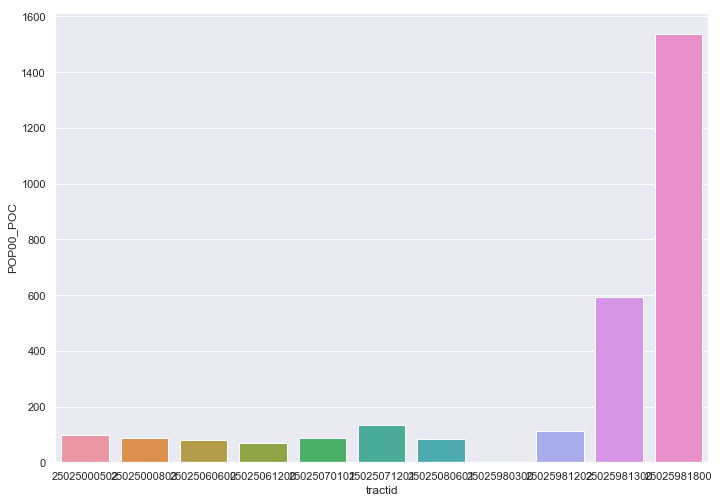

In [51]:
sns.barplot(y='POP00_POC',x='tractid',data=df[df['POP00_POC']>50])

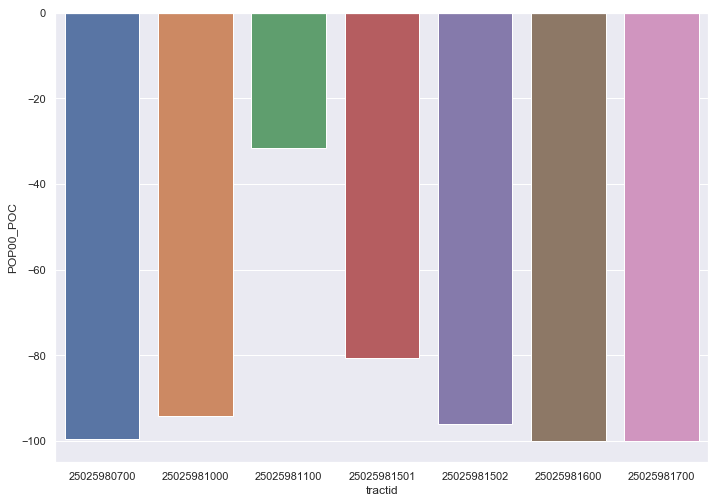

In [52]:
sns.barplot(y='POP00_POC',x='tractid',data=df[df['POP00_POC']<-20])